## 09-2 순환신경망

In [1]:
import numpy as np
# 1.텐서플로에서 imdb데이터 세트 불러오기
from tensorflow.keras.datasets import imdb

In [2]:
(x_train_all, y_train_all),(x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

- skip_top 매개 변수에는 가장 많이 등장하는 단어들 중 건너뛸 단어의 개수를 지정
- num_words 매개변수에는 훈련에 사용할 단어의 개수 (이 실습에서는 메모리 절약하기 위해 100 지정)

In [3]:
# 2.훈련세트 크기 확인
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [4]:
# 3.훈련 세트의 샘플 확인
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [5]:
# 4.훈련세트에서 2 제외하기
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [6]:
# 5.어휘사전 내려받기
word_to_index = imdb.get_word_index()

- 정수를 영단어로 바꾸려면 어휘 사전 필요.
- 어휘사전은 get_word_index()함수로 내려받을 수 있음.

In [7]:
word_to_index['movie']    # movie라는 영단어는 17 정수에 대응되어 있음.

17

In [8]:
# 6.훈련 세트의 정수를 영단어로 변환하기
index_to_word = {word_to_index[k]: k for k in word_to_index}

# 훈련세트에 있는 정수는 3이상부터 영단어를 의미하므로 3을 뺸 값을 어휘사전의 인덱스로 사용
for w in x_train_all[0]:
    print(index_to_word[w -3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [9]:
# 7.훈련샘플의 길이 확인하기
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


- 샘플의 길이가 다르면 모델을 제대로 훈련시킬 수 없음.

In [10]:
# 8.훈련세트의 타깃 데이터 확인하기
# 긍정(1), 부정(0)

print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [12]:
# 9.검증세트 준비

np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

- 25,000개의 훈련 세트 중 5,000개만 분리하여 검증세트로 사용.
- 넘파이 permutation()함수를 사용하여 25,000개의 인덱스를 섞은 후, 앞 20,000개는 훈련세트, 나머지는 검증세트로 분리.

In [15]:
# 샘플의 길이 맞추기
# 1.텐서플로로 샘플의 길이 맞추기
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [16]:
# 2.길이 조정한 훈련세트의 크기와 샘플 확인
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [17]:
# 샘플 길이 변경한 훈련세트의 첫번째 샘플 확인
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [18]:
# 샘플을 원-핫 인코딩하기
# 1.텐서플로로 원-핫 인코딩하기
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [19]:
# 2.원-핫 인코딩으로 변환된 변수의 x_train_onehot크기확인
print(x_train_onehot.shape)

(20000, 100, 100)


In [20]:
# 3.x_train_onehot의 크기 확인
print(x_train_onehot.nbytes)

800000000


In [21]:
# 순환 신경망 클래스 구현하기

import tensorflow as tf

class RecurrentNetwork:
    
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells     # 셀 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1h = None            # 은닉 상태에 대한 가중치
        self.w1x = None            # 입력에 대한 가중치
        self.b1 = None             # 순환층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.h = None              # 순환층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률

    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))]   # 은닉 상태를 초기화합니다.
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        # 순환 층의 선형 식을 계산합니다.
        for x in seq:
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1)                    # 활성화 함수를 적용합니다.
            self.h.append(h)                   # 역전파를 위해 은닉 상태 저장합니다.
            z2 = np.dot(h, self.w2) + self.b2  # 출력층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        
        w1h_grad = w1x_grad = b1_grad = 0
        # 셀 직전까지 그래디언트를 계산합니다.
        err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
        # 모든 타임 스텝을 거슬러가면서 그래디언트를 전파합니다.
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            # 이전 타임 스텝의 셀 직전까지 그래디언트를 계산합니다.
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)
        
        w1h_grad /= m
        w1x_grad /= m
        b1_grad /= m
    
        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
    
    def init_weights(self, n_features, n_classes):
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()
        
        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() # (셀 개수, 셀 개수)
        self.w1x = glorot_init((n_features, self.n_cells)).numpy() # (특성 개수, 셀 개수)
        self.b1 = np.zeros(self.n_cells)                           # 은닉층의 크기
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy()   # (셀 개수, 클래스 개수)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)       # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 셀의 가중치와 절편을 업데이트합니다.
        self.w1h -= self.lr * w1h_grad
        self.w1x -= self.lr * w1x_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return z > 0                 # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)

In [22]:
# 1.순환신경망 모델 훈련시키기

rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)
rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

에포크 12 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 13 ........................................................................................................................................................................................................................................................................................................................................................................

<function matplotlib.pyplot.show(*args, **kw)>

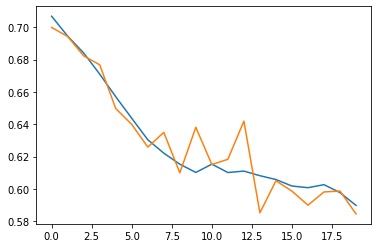

In [23]:
# 2.훈련, 검증세트에 대한 손실 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show

In [24]:
# 3.검증세트 정확도 평가하기
rn.score(x_val_onehot, y_val)

0.6888

## 09-3 텐서플로로 순환신경망 만들기

In [25]:
# SimpleRNN클래스로 순환신경망 만들기
# 1. 순환신경망에 필요한 클래스 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [27]:
# 2.모델만들기

model = Sequential()

model.add(SimpleRNN(32, input_shape=(100,100))) #타임스텝의 길이가 100이고 원-핫인코딩 크기가 100이므로 입력크기(100,100)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 3.모델 컴파일하고 훈련시키기

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32,
                   validation_data=(x_val_onehot, y_val))


Epoch 1/20
625/625 [==============================] - 4s 6ms/step - loss: 0.7019 - accuracy: 0.5050 - val_loss: 0.6926 - val_accuracy: 0.5254
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6841 - accuracy: 0.5594 - val_loss: 0.6764 - val_accuracy: 0.5784
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6877 - accuracy: 0.5495 - val_loss: 0.6753 - val_accuracy: 0.5886
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6614 - accuracy: 0.6077 - val_loss: 0.6421 - val_accuracy: 0.6374
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6372 - accuracy: 0.6449 - val_loss: 0.6493 - val_accuracy: 0.6194
Epoch 6/20
625/625 [==============================] - 4s 7ms/step - loss: 0.6202 - accuracy: 0.6594 - val_loss: 0.6246 - val_accuracy: 0.6612
Epoch 7/20
625/625 [==============================] - 4s 6ms/step - loss: 0.6087 - accuracy: 0.6723 - val_loss: 0.6324 - val_accuracy: 0.6418
Epoch 

<function matplotlib.pyplot.show(*args, **kw)>

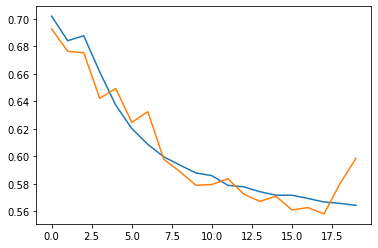

In [30]:
# 4.훈련,검증세트에 대한 손실그래프와 정확도그래프 그리기

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

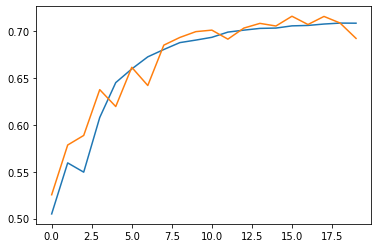

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [34]:
# 검증세트 정확도 평가하기
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(loss)
print(accuracy)

0.5985326766967773
0.6919999718666077


In [35]:
# 임베딩 층으로 순환 신경망 모델 성능 높이기
# 1.Embedding클래스 임포트하기
from tensorflow.keras.layers import Embedding

In [36]:
# 2. 훈련데이터 준비하기
# 단어 임베딩은 단어를 표현하는 벡터의 크기를 임의로 지정할수 있으므로 단어의 개수에 영향을 받지 않음.

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [37]:
# 3.샘플 길이 맞추기
# 타임 스텝의 길이가 100인 시퀀스 데이터

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [39]:
# 4.모델만들기
model_ebd = Sequential()

model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [40]:
# 5.모델을 컴파일하고 훈련시키기

model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                        validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4837 - accuracy: 0.7764 - val_loss: 0.4558 - val_accuracy: 0.7982
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3970 - accuracy: 0.8302 - val_loss: 0.4463 - val_accuracy: 0.7948
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3682 - accuracy: 0.8475 - val_loss: 0.4356 - val_accuracy: 0.8050
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3434 - accuracy: 0.8570 - val_loss: 0.4495 - val_accuracy: 0.8026
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3223 - accuracy: 0.8655 - val_loss: 0.4736 - val_accuracy: 0.8048
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3082 - accuracy: 0.8742 - val_loss: 0.4733 - val_accuracy: 0.7848
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2897 - accuracy: 0.8831 - val_loss: 0.4930 - val_accuracy: 0.7946
Epoch 

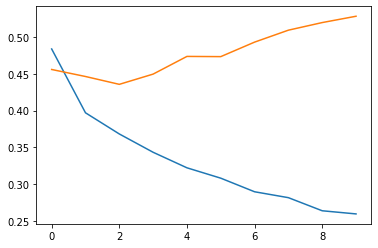

In [41]:
# 6.손실그래프와 정확도그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

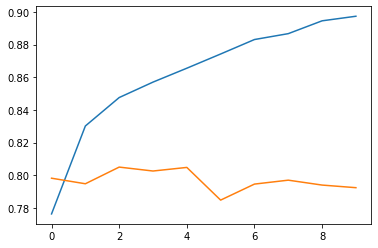

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [43]:
# 7.검증세트 정확도 평가하기
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.7924000024795532


## 09-4 LSTM

In [44]:
# 1.LSTM 순환 신경망 만들기
from tensorflow.keras.layers import LSTM


model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 2.모델훈련하기

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                         validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.4638 - accuracy: 0.7879 - val_loss: 0.3804 - val_accuracy: 0.8348
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3379 - accuracy: 0.8572 - val_loss: 0.3600 - val_accuracy: 0.8436
Epoch 3/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3075 - accuracy: 0.8724 - val_loss: 0.3596 - val_accuracy: 0.8446
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.2883 - accuracy: 0.8817 - val_loss: 0.3655 - val_accuracy: 0.8364
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.2740 - accuracy: 0.8870 - val_loss: 0.3754 - val_accuracy: 0.8366
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 0.2639 - accuracy: 0.8924 - val_loss: 0.3787 - val_accuracy: 0.8338
Epoch 7/10
625/625 [==============================] - 6s 9ms/step - loss: 0.2527 - accuracy: 0.8979 - val_loss: 0.3932 - val_accuracy: 0.8310
Epoch 

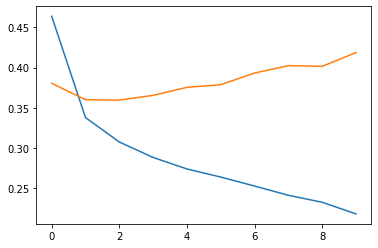

In [46]:
# 3.손실그래프와 정확도그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

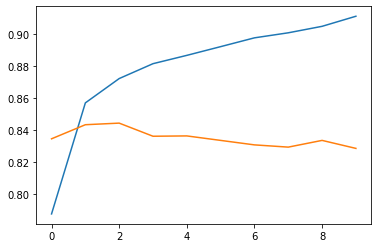

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [48]:
# 4.검증세트 정확도 평가하기

loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8288000226020813
